In [7]:
from numpy import random
import torch
from torch.utils.data import DataLoader
from helpers import MCSims, plot_field_xy_compare
from models.auto_encoder import Autoencoder

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dataset = MCSims()

encoded_data = torch.load('encoded_data.pth')
decoded_data = torch.load('decoded_data.pth')

n = random.randint(0, len(dataset))
plot_field_xy_compare(original_tensor=dataset[n],
                      reconstructed_tensor=decoded_data[n])


BokehModel(combine_events=True, render_bundle={'docs_json': {'86864689-ef7b-4b0e-a1d5-bf865f4834e6': {'version…

In [ ]:
import hdbscan
data = encoded_data.cpu().numpy()

clusterer = hdbscan.HDBSCAN(min_cluster_size=10, gen_min_span_tree=True)
labels = clusterer.fit_predict(data)

# print number of clusters and number of points in each cluster
for i in set(labels):
    print('Cluster {}: {}'.format(i, sum(labels == i)))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 38.0 MB/s eta 0:00:00
Cluster 0: 15
Cluster 1: 16
Cluster 2: 15
Cluster 3: 18
Cluster 4: 14
Cluster 5: 24
Cluster 6: 38
Cluster 7: 12
Cluster 8: 22
Cluster 9: 24
Cluster 10: 18
Cluster 11: 49
Cluster 12: 11
Cluster 13: 41
Cluster 14: 29
Cluster 15: 34
Cluster 16: 21
Cluster 17: 43
Cluster 18: 10
Cluster 19: 184
Cluster 20: 957
Cluster -1: 1006


In [ ]:
df = dataset.data_frame
df['cluster'] = labels

        H (A/m)   T (K)                                               File  \
0      0.000000  2280.0  /scratch/holtsamu/fege_phase_diagram/temperatu...   
1   7957.747150  2280.0  /scratch/holtsamu/fege_phase_diagram/temperatu...   
2  15915.494301  2280.0  /scratch/holtsamu/fege_phase_diagram/temperatu...   
3  23873.241451  2280.0  /scratch/holtsamu/fege_phase_diagram/temperatu...   
4  31830.988601  2280.0  /scratch/holtsamu/fege_phase_diagram/temperatu...   

   cluster  
0       -1  
1       -1  
2       14  
3       15  
4       -1  


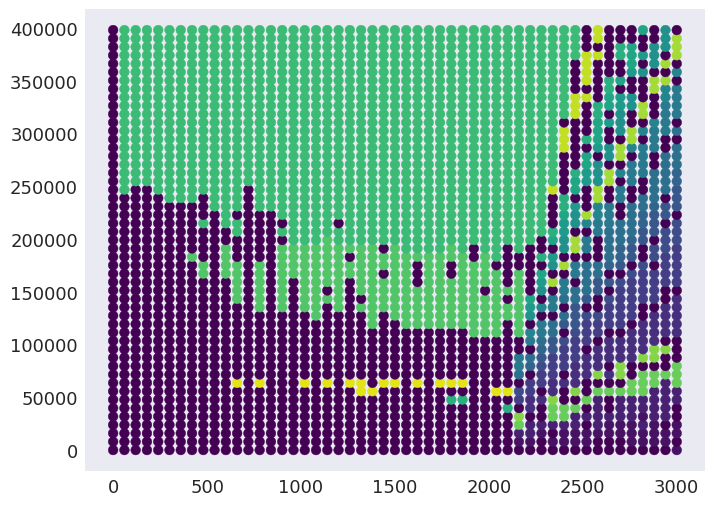

In [18]:
# plot H vs T with with different colors for each cluster
import matplotlib.pyplot as plt
# Create a list of unique clusters
unique_clusters = df['cluster'].unique()

# Assign a color for each cluster (using a colormap, e.g., 'viridis')
cmap = plt.get_cmap('viridis')
colors = [cmap(i / len(unique_clusters)) for i in range(len(unique_clusters))]

# Map the cluster labels to the corresponding colors
color_map = {cluster: colors[i] for i, cluster in enumerate(unique_clusters)}
df['color'] = df['cluster'].map(color_map)

# Plot with colors based on cluster
plt.scatter(df['T (K)'], df['H (A/m)'], c=df['color'], marker='o')
plt.show()